<a href="https://colab.research.google.com/github/YoonieJang/CS481/blob/main/instagram_API_(public).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## instagram pseudo-API request

인스타그램 정보를 수집하는 것은 까다로운 심사 절차가 필요.

-> 직접 접속하여 HTML 코드를 분석해 크롤링할 필요 

>>> https://www.instagram.com/explore/tags/공감

-> 하지만 인스타그램의 HTML 코드는 매우 복잡

인스타그램 접속 주소 뒤에 "?__a=1"이라는 인자를 붙이면 **JSON형태**로 데이터를 전송받을 수 있음!

>>> https://www.instagram.com/explore/tags/공감/?__a=1

In [ ]:
from urllib import request

url = "https://www.instagram.com/explore/tags/%EA%B3%B5%EA%B0%90/?__a=1" #공감이라고 쓰면 안됨. URL 인코딩
response = request.urlopen(url)
html = response.read()

In [ ]:
import urllib
urllib.parse.quote("공감") #URL받을 때 '공감'이라고 쓰면 안되니까 해당 절을 URL 언어로 바꿔줌

'%EA%B3%B5%EA%B0%90'

In [ ]:
import json
parsed_data = json.loads(html)
print(parsed_data)

{'graphql': {'hashtag': {'id': '17841545908127554', 'name': '공감', 'allow_following': False, 'is_following': False, 'is_top_media_only': False, 'profile_pic_url': 'https://scontent-sea1-1.cdninstagram.com/vp/248da7d1757a5f272a59d36a88be384d/5C91CDB5/t51.2885-15/e35/s150x150/43129917_2124434764274375_8910384061975025004_n.jpg', 'edge_hashtag_to_media': {'count': 2616056, 'page_info': {'has_next_page': True, 'end_cursor': 'QVFCalQyQWxTNzY3RUdfMTMwcGpOaDN1ak1TUW1GOFg0c2xaaUx5TTdDbVBoUFJ4M2tIQmRFSjNfM3hwbklvYnE2WUJSbi1zaVZuUVI2Q2dLZ0ZlUTVVZQ=='}, 'edges': [{'node': {'comments_disabled': False, '__typename': 'GraphImage', 'id': '1918914505363054527', 'edge_media_to_caption': {'edges': [{'node': {'text': '한달에 한번 정기적 코스!! 서점!!\n이번달엔 무슨 책들이 나왔고 세상 지식인들과 사람들의 핵심 관심사 키워드가 뭔지 꼭 둘러보러 온다. 시대에 뒤쳐지지 않기 위한 작은 지혜!!??ㅋㅋ\n\n사실 이미 나온다는 2달이 넘어따ㅠㅠ이제서야 겟!! 그 당시엔 이 책보다 내상황에 맞게 더 중요한 책을 고르고 읽느라 여유가 없었지 이제서야!! 내가 존경하는 #류시화 작가님 책 겟했돠!!!❤️\U0001f91f #밤#취미#서적#책#도서#책스타그램#북스타그램#책스타그램#굿#좋아요#좋은글#우화#인생#취향저격#교보문고#행복#일상@일

json.dumps() 메쏘드에 indent 값을 설정하면 조금 더 보기 좋게 출력 가능

<pre><code>
print(json.dumps(parsed_data, indent=4))
</code></pre>

In [ ]:
print(json.dumps(parsed_data, indent=4))

In [ ]:
print (type(parsed_data))
print (type(json.dumps(parsed_data)))

<class 'dict'>
<class 'str'>


아래 사이트를 이용하면 복잡한 JSON을 Tree구조로 볼 수 있음

>>> https://www.sitepoint.com/demos/online-json-tree-viewer/

인스타그램에서 제공해준 JSON을 구조를 살펴보면 아래와 같이 요약할 수 있음

graphql -> hashtag -> id, name, profile_pic_url -> edge_hashtag_to_media -> count, edges -> node

각각의 요소에 어떻게 접근할 수 있는지 실습해보기

In [ ]:
graphql = parsed_data["graphql"] #json에서 트리구조 순서대로 추출한 데이터
hashtag = graphql["hashtag"]

print (hashtag["id"])
print (hashtag["name"])
print (hashtag["profile_pic_url"])

17841545908127554
공감
https://scontent-sea1-1.cdninstagram.com/vp/248da7d1757a5f272a59d36a88be384d/5C91CDB5/t51.2885-15/e35/s150x150/43129917_2124434764274375_8910384061975025004_n.jpg


In [ ]:
edge_hashtag_to_media = hashtag["edge_hashtag_to_media"] #json에서 트리구조에서 가져온 노드 edge_~media

print (edge_hashtag_to_media["count"])

2616056


str.format()을 이용해 숫자 천단위 구분점을 찍는 방법은?

In [ ]:
print("{:,}".format(edge_hashtag_to_media["count"]))  #{:,} 숫자 천단위별로 ','찍어줌

2,616,056


""#공감"을 해시태그로 갖는 포스트들에 접근해보기

In [ ]:
edges = edge_hashtag_to_media["edges"]

print (edges)
print (type(edges))

[{'node': {'comments_disabled': False, '__typename': 'GraphImage', 'id': '1918914505363054527', 'edge_media_to_caption': {'edges': [{'node': {'text': '한달에 한번 정기적 코스!! 서점!!\n이번달엔 무슨 책들이 나왔고 세상 지식인들과 사람들의 핵심 관심사 키워드가 뭔지 꼭 둘러보러 온다. 시대에 뒤쳐지지 않기 위한 작은 지혜!!??ㅋㅋ\n\n사실 이미 나온다는 2달이 넘어따ㅠㅠ이제서야 겟!! 그 당시엔 이 책보다 내상황에 맞게 더 중요한 책을 고르고 읽느라 여유가 없었지 이제서야!! 내가 존경하는 #류시화 작가님 책 겟했돠!!!❤️\U0001f91f #밤#취미#서적#책#도서#책스타그램#북스타그램#책스타그램#굿#좋아요#좋은글#우화#인생#취향저격#교보문고#행복#일상@일상그램#잇템#저녁#인친#안녕#소통#공감#공유#글#글귀'}}]}, 'shortcode': 'BqhWpNmgl-_', 'edge_media_to_comment': {'count': 0}, 'taken_at_timestamp': 1542972456, 'dimensions': {'height': 1350, 'width': 1080}, 'display_url': 'https://scontent-sea1-1.cdninstagram.com/vp/0a365b222ad1ef8bd2aefe15a3b2507b/5C78915A/t51.2885-15/e35/44532283_299990524186329_6422857035686614053_n.jpg', 'edge_liked_by': {'count': 2}, 'edge_media_preview_like': {'count': 2}, 'owner': {'id': '8688440790'}, 'thumbnail_src': 'https://scontent-sea1-1.cdninstagram.com/vp/334bd6fc16d3118ed946acd1188f3b01/5C7C

연관된 포스트 중 하나만 선택해 포스트 id와 포스트 내용 뽑아오기

In [ ]:
for edge in edges: #edges list형태
  
  node = edge["node"]
  post_id = node["id"]
  post_text = node["edge_media_to_caption"]["edges"][0]["node"]["text"]
  
  print (post_id)
  print (post_text)
  
  #하나의 포스트만 추출

1918914505363054527
한달에 한번 정기적 코스!! 서점!!
이번달엔 무슨 책들이 나왔고 세상 지식인들과 사람들의 핵심 관심사 키워드가 뭔지 꼭 둘러보러 온다. 시대에 뒤쳐지지 않기 위한 작은 지혜!!??ㅋㅋ

사실 이미 나온다는 2달이 넘어따ㅠㅠ이제서야 겟!! 그 당시엔 이 책보다 내상황에 맞게 더 중요한 책을 고르고 읽느라 여유가 없었지 이제서야!! 내가 존경하는 #류시화 작가님 책 겟했돠!!!❤️🤟 #밤#취미#서적#책#도서#책스타그램#북스타그램#책스타그램#굿#좋아요#좋은글#우화#인생#취향저격#교보문고#행복#일상@일상그램#잇템#저녁#인친#안녕#소통#공감#공유#글#글귀
1918914387981538628
어중간한 재능, 진짜 재능 만들기 11
-사실 알고 있었죠? 이젠 스스로를 돌봐 줄 시간이라는 걸 말이예요

#글귀스타그램 #글그램 #글스타그램 #글귀 #글쓰기 #글 #시 #위로 #위로글 #위로글귀 #공감글 #공감 #공감글귀 #love #loveyourself  #relax #relaxing #슬픈 #슬픈글귀 #짧은글귀 #수고했어요 #수고했어오늘도 #인간관계
1918914317577418300
연말페디도 준비하세용~^^
.
.
.
😻도도스네일 11월이벤트😻
●이달의아트
#현금가5만5천(회원가5만)#
●손발동시예약시 10%할인
●아트free 손6만/발5만
(캐릭터.스톤.파츠는 추가금발생有)
●웨딩패키지(11-1월까지) ♡30만원♡
-웨딩촬영, 본식
-발각질1회
-어머님네일
-신랑님 손케어
ㅡ청첩장소지시 가능.#현금이벤트#
●모닝이벤트 (pm.1시까지)
젤네일2만9천/젤패디3만9천
*현금가.풀컬러기본가
●지인소개or인스타 태그시 5천적립
●발각질+케어=20만원=4회(1회6만원가)
✔드릴케어.쏙오프.굳은살케어서비스
✔예약시  ㅡ원하시는 시간대  ㅡ젤제거유무와  ㅡ 원하시는아트  먼저 말씀해쥬세요^^
✔타샵젤제거 1만추가
✔풋스파발각질로 애기발만들기5만(회원가)
✔속눈썹연장 3만원부터~~
월요일휴무
.
.
#gelnails #nails #manicure

HashTag만 추출하기

In [ ]:
tags =[]
for edge in edges:
  
  node = edge["node"]
  post_id = node["id"]
  
  try:
    post_text = node["edge_media_to_caption"]["edges"][0]["node"]["text"]
  
    for word in post_text.split():
      if word.startswith("#"):
        tags.append(word)
    
  except:
    pass
  
  print(tags)

['#류시화', '#밤#취미#서적#책#도서#책스타그램#북스타그램#책스타그램#굿#좋아요#좋은글#우화#인생#취향저격#교보문고#행복#일상@일상그램#잇템#저녁#인친#안녕#소통#공감#공유#글#글귀']
['#류시화', '#밤#취미#서적#책#도서#책스타그램#북스타그램#책스타그램#굿#좋아요#좋은글#우화#인생#취향저격#교보문고#행복#일상@일상그램#잇템#저녁#인친#안녕#소통#공감#공유#글#글귀', '#글귀스타그램', '#글그램', '#글스타그램', '#글귀', '#글쓰기', '#글', '#시', '#위로', '#위로글', '#위로글귀', '#공감글', '#공감', '#공감글귀', '#love', '#loveyourself', '#relax', '#relaxing', '#슬픈', '#슬픈글귀', '#짧은글귀', '#수고했어요', '#수고했어오늘도', '#인간관계']
['#류시화', '#밤#취미#서적#책#도서#책스타그램#북스타그램#책스타그램#굿#좋아요#좋은글#우화#인생#취향저격#교보문고#행복#일상@일상그램#잇템#저녁#인친#안녕#소통#공감#공유#글#글귀', '#글귀스타그램', '#글그램', '#글스타그램', '#글귀', '#글쓰기', '#글', '#시', '#위로', '#위로글', '#위로글귀', '#공감글', '#공감', '#공감글귀', '#love', '#loveyourself', '#relax', '#relaxing', '#슬픈', '#슬픈글귀', '#짧은글귀', '#수고했어요', '#수고했어오늘도', '#인간관계', '#현금가5만5천(회원가5만)#', '#gelnails', '#nails', '#manicure', '#pedicure', '#nailart', '#네일', '#소통해요', '#인친', '#환영', '#행신동속눈썹', '#프렌치네일', '#화정네일', '#행신네일', '#행신동네일', '#원흥네일', '#원당네일', '#젤네일아트', '#공감', '#소통', '#일상스타그램', '#데일리그램', '#눈꽃', '#젤네일', '#스톤네일', '#네일스타그램', '#발

"공감"이라는 해시태그와 함께 나타난 해시태그들 모두 세보기

In [ ]:
tags = []
for edge in edges:
  
  node = edge["node"]
  post_id = node["id"]
  post_text = node["edge_media_to_caption"]["edges"][0]["node"]["text"]
  
  #print (post_text)
  
  #tags = []

  
  
  
        
  #print (tags)

print (tags)

[]


중간에 다른 형태를 가진 node가 존재하여 에러가 발생

try, except를 이용해 해당 node는 무시하고 진행하게 코드를 수정

In [ ]:
tags = []
for edge in edges:
  
  node = edge["node"]
  post_id = node["id"]
  
  try:
    post_text = node["edge_media_to_caption"]["edges"][0]["node"]["text"]
  
  #print (post_id)
  #print (post_text)


print (tags)

IndentationError: ignored

리스트에서 원소의 개수를 세는 방법은?

Counter 사용해보기

In [ ]:
from collections import Counter
Counter(tags)

Counter()

Counter() 결과 내림차순으로 정렬하기

In [ ]:
Counter(tags).most_common()

[]

빈번하게 나오는 것들 중 10개만 보고 싶을 때

In [ ]:
Counter(tags).most_common(10)

[]

워드클라우드 그려보기

1. 라이브러리 설치

In [ ]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 7.8MB/s 


2. 라이브러리 불러오기

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

3. 구름 객체 생성하기

In [ ]:
wc = WordCloud().generate_from_frequencies(Counter(tags))
#WordCloud().generate(text)

4. 그림 그리기

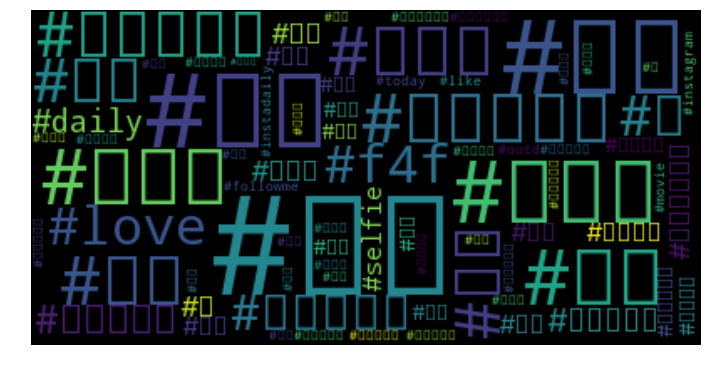

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

한글 폰트로 인해 문제가 발생

한글 폰트 설치하기

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 5 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubun

설치된 한글 폰트를 사용해 그림 그리게 설정

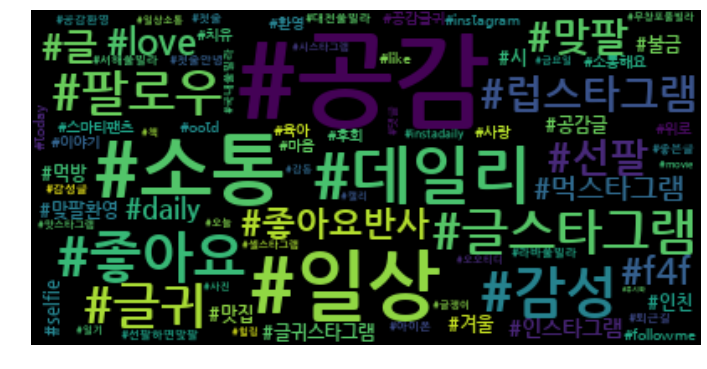

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(font_path=font_path)
cloud = wc.generate_from_frequencies(Counter(tags))

plt.figure(figsize=(12,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

가장 빈번하게 나온 20개 단어만으로 그림을 그려보면?

<pre><code>
Counter(tags).most_common(20) #List이므로 Dict로 변환할 필요
</code></pre>

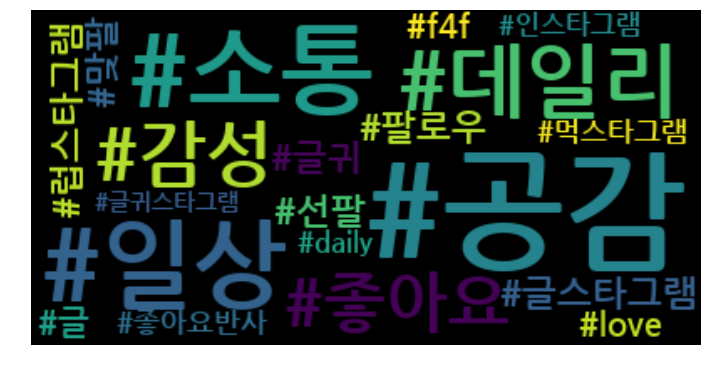

In [ ]:
wc = WordCloud(font_path=font_path)
cloud = wc.generate_from_frequencies(dict(Counter(tags).most_common(20))) #list형태인 tags를 dict형태로 바꿔줌, 

#instagram은 문장이 아닌 단어별로 되어있어, 데이터 추출 시 형태소 분석에 자유로움

plt.figure(figsize=(12,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()